In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


In [49]:
out_dir = os.path.join(os.getcwd(), "../../out/regression/cart")

In [50]:
def plot_data(ax, data, x, y):
    sns.scatterplot(x=data[x], y=data[y], ax=ax)

def plot_model(ax, xs, model):
    y_hat = model.predict(xs.reshape(-1, 1))
    sns.lineplot(x=xs, y=y_hat, color='orange', ax=ax)

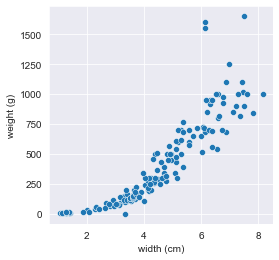

In [51]:
df = pd.read_csv('data/fish.csv')[['Width', 'Weight']].rename(columns={
    'Width': 'width (cm)',
    'Weight': 'weight (g)'
})

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(ax, df, 'width (cm)', 'weight (g)')

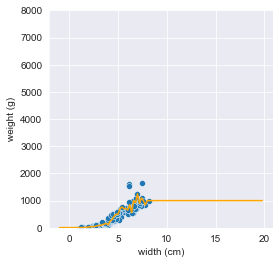

In [52]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()  # Erstellen vom Modell

reg.fit(X=df[['width (cm)']].values, y=df['weight (g)'])  # Modell lernt (Lernphase)

_, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(ax, df, 'width (cm)', 'weight (g)')
plot_model(ax, np.arange(-1, 20, 0.2), reg)
ax.set_ylim([0, 8000])
# plt.savefig(os.path.join(out_dir, 'cart-extrapolation-limit.png'), bbox_inches='tight')
plt.show()

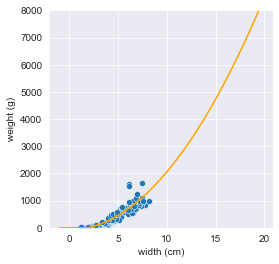

In [53]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline

reg = make_pipeline(
    PolynomialFeatures(),  # Erstellen vom Modell
    TransformedTargetRegressor(LinearRegression(), inverse_func=lambda x: np.maximum(0, x))
)

reg.fit(X=df[['width (cm)']].values, y=df['weight (g)'])  # Modell lernt (Lernphase)

_, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(ax, df, 'width (cm)', 'weight (g)')
plot_model(ax, np.arange(-1, 20, 0.2), reg)
ax.set_ylim([0, 8000])
# plt.savefig(os.path.join(out_dir, 'cart-extrapolation-nolimit.png'), bbox_inches='tight')
plt.show()

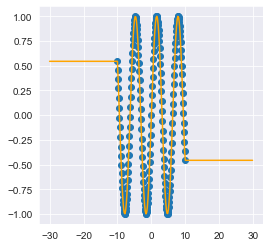

In [62]:
x = np.arange(-10, 10, 0.1)
y = np.sin(x)

reg = DecisionTreeRegressor()
reg.fit(X=x.reshape(-1, 1), y=y)

_, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(x, y)
plot_model(ax, np.arange(-30, 30, 0.2), reg)
plt.savefig(os.path.join(out_dir, 'cart-extrapolation-limit.png'), bbox_inches='tight')
plt.show()

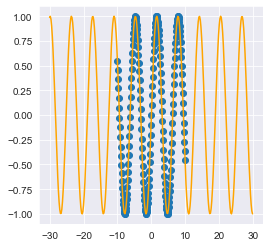

In [64]:
"""
TODO can a NN learn this hard-coded np.sin?
"""

x = np.arange(-10, 10, 0.1)
y = np.sin(x)

_, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(x, y)
sns.lineplot(x=np.arange(-30, 30, 0.2), y=np.sin(np.arange(-30, 30, 0.2)), color='orange', ax=ax)
plt.savefig(os.path.join(out_dir, 'cart-extrapolation-nolimit.png'), bbox_inches='tight')
plt.show()